# Import Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Dataset Explaination 

<b>work_year</b> : The year the salary was paid.

<b>experience_level</b> : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

<b>employment_type</b> : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

<b>job_title</b> : The role worked in during the year.

<b>salary</b> : The total gross salary amount paid.

<b>salary_currency</b> : The currency of the salary paid as an ISO 4217 currency code.

<b>salary_in_usd</b> : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

<b>employee_residence</b> : Employee's primary country of residence in during the work year as an ISO 3166 country code.

<b>remote_ratio</b> : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

<b>company_location</b> : The country of the employer's main office or contracting branch as an ISO 3166 country code.

<b>company_size</b> : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


# Load Dataset

In [2]:
ds_salary_df = pd.read_csv("./Resources/ds_salaries.csv")
ds_salary_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<AxesSubplot:ylabel='work_year'>

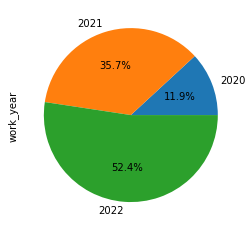

In [3]:
ds_salary_df.groupby('work_year')['work_year'].count().plot.pie(autopct= "%1.1f%%")

In [4]:
ds_salary_df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Observation:
1. Column __Unnamed: 0__ needs to be removed, as it is unnencessary columns.
2. The values of __work_year__ , __salary__ , __salary_in_used__ , __rempte_ratio__ columns are numeric.
3. Almost 52% data are in 2022.

<AxesSubplot:ylabel='salary_currency'>

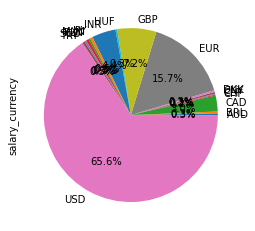

In [5]:
ds_salary_df.groupby('salary_currency')['salary_currency'].count().plot.pie(autopct= "%1.1f%%")

In [6]:
ds_salary_df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

Observation:
1. More than 60% of salary currency is in US Dollar.
2. Second largest salary currency is in EUR.

# Data Cleaning and Handling any missing values


In [7]:
# Drop unecessary columns
ds_salary_df = ds_salary_df.drop(columns=['Unnamed: 0'])


In [8]:
ds_salary_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
# Checking and handling missing values
ds_salary_df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
ds_salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
ds_salary_df.duplicated().sum()

42

There are 42 duplicate , which needs to be dropped.

In [12]:
ds_salary_df[ds_salary_df.duplicated(keep=False)].sort_values('salary_currency').head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
373,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M
443,2022,MI,FT,Data Engineer,60000,GBP,78526,GB,100,GB,M


In [13]:
ds_salary_df[ds_salary_df.duplicated(keep=False)].sort_values('job_title').head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M


In [14]:
ds_salary_df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Observation:
Highest company location for job is in US and second is in GB.

In [15]:
# Drop the duplicate rows
df = ds_salary_df.drop_duplicates()

In [16]:
# Check on the dataset
df.duplicated().sum()

0

In [17]:
# Reset the index
df.reset_index(drop=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
560,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
561,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
562,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
563,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [18]:
# Check any null values
df.isnull().count()

work_year             565
experience_level      565
employment_type       565
job_title             565
salary                565
salary_currency       565
salary_in_usd         565
employee_residence    565
remote_ratio          565
company_location      565
company_size          565
dtype: int64

There are no null values in the dataset.

In [19]:
# Check the unique values.
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

   Here we'll find the unique values in the datasets.

In [20]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [21]:
# Find the counts of different salary currency 
df.groupby('salary_currency')['salary_currency'].count()

salary_currency
AUD      2
BRL      2
CAD     18
CHF      1
CLP      1
CNY      2
DKK      2
EUR     93
GBP     43
HUF      2
INR     27
JPY      3
MXN      2
PLN      3
SGD      2
TRY      3
USD    359
Name: salary_currency, dtype: int64

In [22]:
# Define the title ( job title):

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'


In [23]:
df['job_simp'] = df['job_title'].apply(title_simplifier)
df.job_simp.value_counts()


C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


data engineer     147
data scientist    146
analyst           104
na                 82
mle                60
manager            19
director            7
Name: job_simp, dtype: int64

The data engineer and data scientist is the highest job title as per salary currency, and then analyst job is the second one.

<AxesSubplot:ylabel='job_title'>

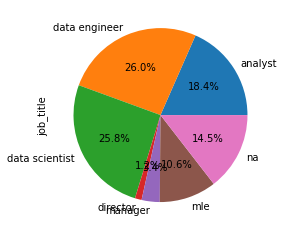

In [24]:
# Create the pie plot visalization according to job title.
df.groupby('job_simp')['job_title'].count().plot.pie(autopct="%1.1f%%")


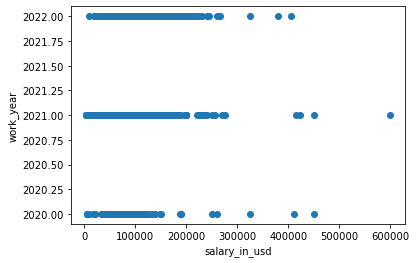

In [54]:
plt.scatter(df.salary_in_usd, df.work_year)
plt.xlabel('salary_in_usd')
plt.ylabel('work_year')
plt.show()


In [55]:
X = df.work_year.values.reshape(-1, 1)


In [56]:
X[:5]

array([[2020],
       [2020],
       [2020],
       [2020],
       [2020]], dtype=int64)

In [57]:
X.shape

(565, 1)

In [58]:
y = df.salary_in_usd

In [59]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [60]:
y_pred = model.predict(X)
print(y_pred.shape)


(565,)


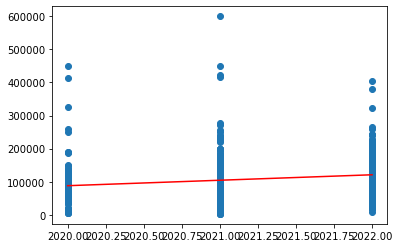

In [61]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [62]:
print(model.coef_)
print(model.intercept_)


[16495.57529263]
-33232961.638995834
